# Iteracyjne metody rozwiązywania równań liniowych

### Czytanka
* Kincaid, Cheney, rozdz. 8.2, str. 319 (bardzo przystępnie napisane)
* Normy wektorów i macierzy:
    * wektorowa: https://en.wikipedia.org/wiki/Norm_(mathematics)
    * macierzowa: https://en.wikipedia.org/wiki/Matrix_norm
* Metoda Jacobiego: https://en.wikipedia.org/wiki/Jacobi_method
* Metoda SOR: https://en.wikipedia.org/wiki/Successive_over-relaxation
* Metoda Gaussa-Seidela: https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method
* (ale wystarczy K&C)

### Troszkę teorii

Chcemy rozwiązać układ równań liniowych postaci $A\mathbf {x} =\mathbf {b} $, gdzie:

$$
A={\begin{bmatrix}a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2n}\\\vdots &\vdots &\ddots &\vdots \\a_{n1}&a_{n2}&\cdots &a_{nn}\end{bmatrix}},\qquad \mathbf {x} ={\begin{bmatrix}x_{1}\\x_{2}\\\vdots \\x_{n}\end{bmatrix}},\qquad \mathbf {b} ={\begin{bmatrix}b_{1}\\b_{2}\\\vdots \\b_{n}\end{bmatrix}}.
$$

Mimo, że dobrze znamy dokładne metody rozwiązania takiego równania, częstokroć w praktyce nie możemy ich zastosować -- przede wszystkim ze względu na rozmiar problemu. Rozwiązanie? Zastosować metody iteracyjne, które, choć nie dadzą nam dokładnego wyniku, pozwolą nam w rozsądnym czasie uzyskać dobrą aproksymację. (Zresztą, dokładne metody też nie dają dokładnych rezultatów z powodu błędów arytmetyki zmiennoprzecinkowej).

_Suchy żarcik dnia: John ma problem. John myśli: "Wiem, użyję arytmetyki zmiennoprzecinkowej." Teraz John ma 1.999999997 problemu. (Zasłyszane w pracy)._


#### Metoda Jacobiego

Metody Jacobiego możemy użyć pod warunkiem, że macierz jest przekątniowo dominująca, tj. mamy $ |a_{ii}|\geq \sum _{j\neq i}|a_{ij}|\quad {\text{dla każdego }}i. $

Pomysł polega na rozkładzie macierzy A na **sumę** dwóch macierzy:
$$
A=D+R\qquad {\text{gdzie}}\qquad D={\begin{bmatrix}a_{11}&0&\cdots &0\\0&a_{22}&\cdots &0\\\vdots &\vdots &\ddots &\vdots \\0&0&\cdots &a_{nn}\end{bmatrix}}{\text{ oraz }}R={\begin{bmatrix}0&a_{12}&\cdots &a_{1n}\\a_{21}&0&\cdots &a_{2n}\\\vdots &\vdots &\ddots &\vdots \\a_{n1}&a_{n2}&\cdots &0\end{bmatrix}}.
$$

Następnie krok iteracji wygląda następująco:
$$ \mathbf {x} ^{(k+1)}=D^{-1}(\mathbf {b} -R\mathbf {x} ^{(k)}), $$

I element po elemencie:
$$ x_{i}^{(k+1)}={\frac {1}{a_{ii}}}\left(b_{i}-\sum _{j\neq i}a_{ij}x_{j}^{(k)}\right),\quad i=1,2,\ldots ,n. $$

Zwróćmy uwagę, że cały trick polega na tym, że macierz $D$ bardzo łatwo odwrócić.

### Zadanie 1.
Zaimplementować metodę Jacobiego i przetestować jej działanie na paru układach równań. Porównać z metodą eliminacji Gaussa użytą do tych samych równań.

In [107]:
import numpy as np

def jacobi_solve(A: np.array, b: np.array, iteration_limit = 100, eps = 1e-20) -> np.array:
    n = len(b)
    if A.shape[0] != A.shape[1] or A.shape[0] != n: raise ValueError("Matrix A must be square, of size equal to b length")
    prev_x = np.zeros(n)
    x = np.zeros(n)
    for k in range(iteration_limit):
        for i in range(n):
            x[i] = b[i]
            for j in range(n):
                if j != i:
                    x[i] -= A[i][j] * prev_x[j]
            x[i] /= A[i][i]
        if np.all([np.abs(x[i] - prev_x[i]) < eps for i in range(n)]):
            return x,k
        prev_x = np.copy(x)
    return x, 100

In [4]:
A = np.array([[34, -5.0300, 5.8090, 7.8320],
               [2.2660, 19.950,  1.2120, 8.0080],
               [8.8500, 5.6810,  455.20, 1.3020],
               [6.7750, -2.253,  2.9080, 3.9700]])

b = np.transpose([9.5740, 7.2190, 5.7300, 6.2910])

print(np.linalg.solve(A,b))
print(jacobi_solve(A,b))

[-0.14571442 -0.28845032  0.01427514  1.65914975]
Convergence reached in 69 iteration
[-0.14571442 -0.28845032  0.01427514  1.65914975]


#### Metoda Gaussa-Seidela

Opiera się na tym samym pomyśle, co metoda Jacobiego, ale przy innym rozkładzie macierzy $A$:

$$
A=L_{*}+U\qquad {\text{where}}\qquad L_{*}={\begin{bmatrix}a_{11}&0&\cdots &0\\a_{21}&a_{22}&\cdots &0\\\vdots &\vdots &\ddots &\vdots \\a_{n1}&a_{n2}&\cdots &a_{nn}\end{bmatrix}},\quad U={\begin{bmatrix}0&a_{12}&\cdots &a_{1n}\\0&0&\cdots &a_{2n}\\\vdots &\vdots &\ddots &\vdots \\0&0&\cdots &0\end{bmatrix}}.
$$

Wtedy układ równań możemy zapisać jako: $ L_{*}\mathbf {x} =\mathbf {b} -U\mathbf {x} $ i iterować tak:

$$ \mathbf {x} ^{(k+1)}=L_{*}^{-1}(\mathbf {b} -U\mathbf {x} ^{(k)}). $$

Element po elemencie:

$$ {\displaystyle x_{i}^{(k+1)}={\frac {1}{a_{ii}}}\left(b_{i}-\sum _{j=1}^{i-1}a_{ij}x_{j}^{(k+1)}-\sum _{j=i+1}^{n}a_{ij}x_{j}^{(k)}\right),\quad i=1,2,\dots ,n.} $$

Podobnie jak z Jacobim, tutaj trick polega na tym, że macierz L jest łatwa do odwrócenia.

### Zadanie 2.
Zaimplementować metodę Gaussa-Seidela i przetestować na tych samych układach równań, co metodę Jacobiego. 

In [106]:
def gauss_seidel_solve(A: np.array, b: np.array, iteration_limit = 100, eps = 1e-20) -> np.array:
    n = len(b)
    if A.shape[0] != A.shape[1] or A.shape[0] != n: raise ValueError("Matrix A must be square, of size equal to b length")
    prev_x = np.zeros(n)
    x = np.zeros(n)
    for k in range(iteration_limit):
        for i in range(n):
            x[i] = b[i]
            for j in range(i):
                x[i] -= A[i][j] * x[j]
            for j in range(i+1, n):
                x[i] -= A[i][j] * prev_x[j]
            x[i] /= A[i][i]
        if np.all([np.abs(x[i] - prev_x[i]) < eps for i in range(n)]):
            return x, k
        prev_x = np.copy(x)
    return x, 100

In [6]:
A = np.array([[34, -5.0300, 5.8090, 7.8320],
               [2.2660, 19.950,  1.2120, 8.0080],
               [8.8500, 5.6810,  455.20, 1.3020],
               [6.7750, -2.253,  2.9080, 3.9700]])

b = np.transpose([9.5740, 7.2190, 5.7300, 6.2910])

print(np.linalg.solve(A,b))
print(gauss_seidel_solve(A,b))

[-0.14571442 -0.28845032  0.01427514  1.65914975]
Convergence reached in 41 iteration
[-0.14571442 -0.28845032  0.01427514  1.65914975]


#### Metoda SOR (Successive Over Relaxation)

Znowu podobnie, tyle, że tym razem rozkładamy macierz na sumę trzech macierzy:

$$
D={\begin{bmatrix}a_{11}&0&\cdots &0\\0&a_{22}&\cdots &0\\\vdots &\vdots &\ddots &\vdots \\0&0&\cdots &a_{nn}\end{bmatrix}},\quad L={\begin{bmatrix}0&0&\cdots &0\\a_{21}&0&\cdots &0\\\vdots &\vdots &\ddots &\vdots \\a_{n1}&a_{n2}&\cdots &0\end{bmatrix}},\quad U={\begin{bmatrix}0&a_{12}&\cdots &a_{1n}\\0&0&\cdots &a_{2n}\\\vdots &\vdots &\ddots &\vdots \\0&0&\cdots &0\end{bmatrix}}.
$$

Co umożliwia zapisanie układu równań tak: $ (D+\omega L)\mathbf {x} =\omega \mathbf {b} -[\omega U+(\omega -1)D]\mathbf {x} $ i daje następujące wzory na iterację:

$$ \mathbf {x} ^{(k+1)}=(D+\omega L)^{-1}{\big (}\omega \mathbf {b} -[\omega U+(\omega -1)D]\mathbf {x} ^{(k)}{\big )}=L_{w}\mathbf {x} ^{(k)}+\mathbf {c} , $$

oraz:

$$ x_{i}^{(k+1)}=(1-\omega )x_{i}^{(k)}+{\frac {\omega }{a_{ii}}}\left(b_{i}-\sum _{j<i}a_{ij}x_{j}^{(k+1)}-\sum _{j>i}a_{ij}x_{j}^{(k)}\right),\quad i=1,2,\ldots ,n. $$

### Zadanie 3.
Zaimplementować metodę SOR i przetestować na tych samych układach.

In [104]:
def sor_solve(A: np.array, b: np.array, omega = 1.0, eps = 1e-20, iteration_limit = 100) -> np.array:
    n = len(b)
    if A.shape[0] != A.shape[1] or A.shape[0] != n: raise ValueError("Matrix A must be square, of size equal to b length")
    if not .0 <= omega <= 2.0: raise ValueError("Appropriate omega should be between 0 and 2q")
    prev_x = np.zeros(n)
    x = np.zeros(n)
    for k in range(iteration_limit):
        for i in range(n):
            x[i] = b[i]
            for j in range(i):
                x[i] -= A[i][j] * x[j]
            for j in range(i+1, n):
                x[i] -= A[i][j] * prev_x[j]
            x[i] = x[i]*omega/A[i][i] + (1-omega)*prev_x[i]
        if np.all([np.abs(x[i] - prev_x[i]) < eps for i in range(n)]):
            return x, k
        prev_x = np.copy(x)
    return x, 100

In [105]:
g = sor_solve(A,b,1.05)
for x in g:
    print(x)

[-0.14571442 -0.28845032  0.01427514  1.65914975]
37


In [84]:
def find_best_omega(A: np.array, b: np.array) -> float:
    min_omega = 0
    min_convergence = 100 
    for omega in np.linspace(.01, 1.99, num=200):
        _, k = sor_solve(A, b, omega)
        if k < min_convergence:
            min_convergence = k
            min_omega = omega
    return min_omega

In [87]:
A = np.array([[34, -5.0300, 5.8090, 7.8320],
               [2.2660, 19.950,  1.2120, 8.0080],
               [8.8500, 5.6810,  455.20, 1.3020],
               [6.7750, -2.253,  2.9080, 3.9700]])

b = np.transpose([9.5740, 7.2190, 5.7300, 6.2910])

print(np.linalg.solve(A,b))
omega = find_best_omega(A,b)
print(omega)
print(sor_solve(A,b, omega))

[-0.14571442 -0.28845032  0.01427514  1.65914975]
1.0547236180904522
(array([-0.14571442, -0.28845032,  0.01427514,  1.65914975]), 36)


### Zadanie 4.
Dla powyższych metod porównać (na wykresie) tempo zbiegania do rozwiązania.

### Pytanie
Jakie jest kryterium zbieżności metod powyżej? Czy zawsze można je stosować?

#### Bonus:
Jak przeklejać piękne wzory z Wikipedii i się przy tym nie namęczyć? (na zajęciach).

In [108]:
def jacobi_generator(A: np.array, b: np.array):
    iteration_limit = 100
    eps = 1e-20
    n = len(b)
    if A.shape[0] != A.shape[1] or A.shape[0] != n: raise ValueError("Matrix A must be square, of size equal to b length")
    prev_x = np.zeros(n)
    x = np.zeros(n)
    for k in range(iteration_limit):
        for i in range(n):
            x[i] = b[i]
            for j in range(n):
                if j != i:
                    x[i] -= A[i][j] * prev_x[j]
            x[i] /= A[i][i]
        if np.all([np.abs(x[i] - prev_x[i]) < eps for i in range(n)]):
            return x,k
        prev_x = np.copy(x)
        yield x
    return x, 100

def gauss_seidel_generator(A: np.array, b: np.array):
    iteration_limit = 100
    eps = 1e-20    
    n = len(b)
    if A.shape[0] != A.shape[1] or A.shape[0] != n: raise ValueError("Matrix A must be square, of size equal to b length")
    prev_x = np.zeros(n)
    x = np.zeros(n)
    for k in range(iteration_limit):
        for i in range(n):
            x[i] = b[i]
            for j in range(i):
                x[i] -= A[i][j] * x[j]
            for j in range(i+1, n):
                x[i] -= A[i][j] * prev_x[j]
            x[i] /= A[i][i]
        if np.all([np.abs(x[i] - prev_x[i]) < eps for i in range(n)]):
            return x, k
        prev_x = np.copy(x)
        yield x
    return x, 100

def sor_generator(A: np.array, b: np.array, omega: float = 1.0):
    iteration_limit = 100
    eps = 1e-20    
    n = len(b)
    if A.shape[0] != A.shape[1] or A.shape[0] != n: raise ValueError("Matrix A must be square, of size equal to b length")
    if not .0 <= omega <= 2.0: raise ValueError("Appropriate omega should be between 0 and 2q")
    prev_x = np.zeros(n)
    x = np.zeros(n)
    for k in range(iteration_limit):
        for i in range(n):
            x[i] = b[i]
            for j in range(i):
                x[i] -= A[i][j] * x[j]
            for j in range(i+1, n):
                x[i] -= A[i][j] * prev_x[j]
            x[i] = x[i]*omega/A[i][i] + (1-omega)*prev_x[i]
        if np.all([np.abs(x[i] - prev_x[i]) < eps for i in range(n)]):
            return x, k
        yield x
        prev_x = np.copy(x)
    return x, 100

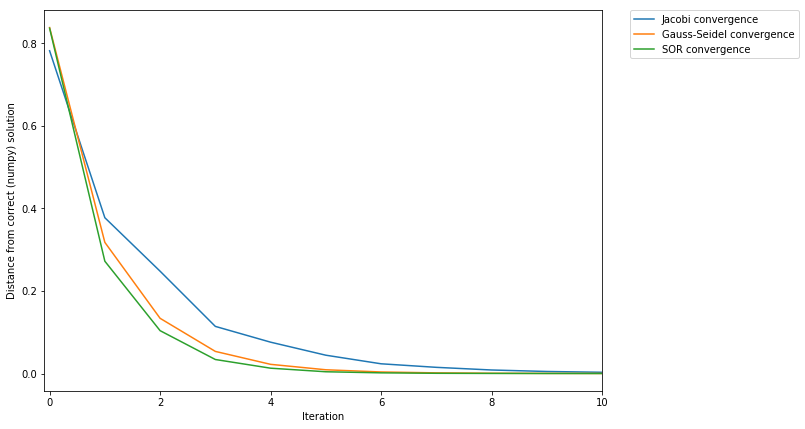

In [134]:
import matplotlib.pyplot as plt

A = np.array([[34, -5.0300, 5.8090, 7.8320],
               [2.2660, 19.950,  1.2120, 8.0080],
               [8.8500, 5.6810,  455.20, 1.3020],
               [6.7750, -2.253,  2.9080, 3.9700]])

b = np.transpose([9.5740, 7.2190, 5.7300, 6.2910])
x = np.linalg.solve(A, b)

jac = [np.linalg.norm(y - x) for y in jacobi_generator(A,b)]
gs = [np.linalg.norm(y - x) for y in gauss_seidel_generator(A,b)]
omega = find_best_omega(A, b)
sor = [np.linalg.norm(y - x) for y in sor_generator(A,b, omega)]

plt.close()
plt.figure(figsize=(10,7))
plt.plot(jac, label='Jacobi convergence')
plt.plot(gs, label='Gauss-Seidel convergence')
plt.plot(sor, label='SOR convergence')
plt.ylabel('Distance from correct (numpy) solution')
plt.xlabel('Iteration')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-0.1,10)
plt.show()